# I. Numpy

### Импортируйте NumPy

In [ ]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [4]:
np_arr = np.zeros(10)
np_arr[5] = 1
np_arr

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [12]:
np_orig = np.arange(10,50,1)[::-1]
np_even = np_orig[np_orig % 2 == 0]
np_even

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [14]:
np_3_3 = np.arange(0,9,1)
np_3_3.resize(3,3)
np_3_3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [22]:
np_4_3_2 = np.random.rand(4,3,2)
print(np_4_3_2.max())
print(np_4_3_2.min())

0.8773877278303563
0.006273312224167937


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [25]:
np_6_4 = np.random.rand(6,4)
np_4_3 = np.random.rand(4,3)
np_6_4.dot(np_4_3)

array([[0.89084829, 1.1558515 , 0.94941562],
       [1.24829278, 1.44648089, 0.72825802],
       [0.47241789, 0.66779893, 0.70063145],
       [1.15852769, 1.24243426, 0.82720478],
       [0.58953686, 0.48510137, 0.35625652],
       [0.33835046, 0.48421532, 0.31187585]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [28]:
np_7x7 = np.random.rand(7,7)
print(np_7x7.mean())
print(np_7x7.std())

0.5020645274989077
0.25765314920924165


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [6]:
tips = sns.load_dataset("tips")


### Посмотрите на первые 5 строчек

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [6]:
tips.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [7]:
tips.isna().sum()
#пропусков нет

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

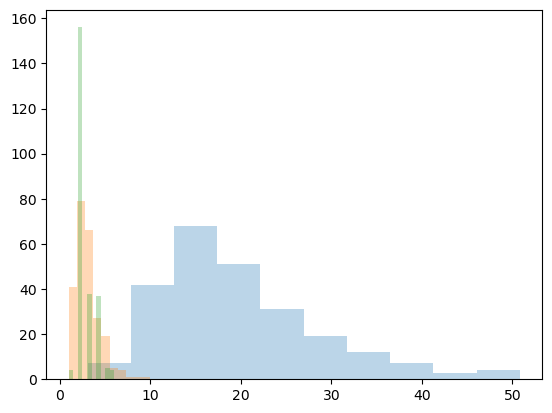

In [47]:
kwargs = dict(alpha=0.3)
plt.hist(tips['total_bill'], **kwargs);
plt.hist(tips['tip'], **kwargs);
plt.hist(tips['size'], **kwargs);

### Найдите максимальное значение 'total_bill'

In [21]:
tips['total_bill'].max()

50.81

### Найдите количество курящих людей

In [31]:
tips[tips['smoker'] == 'Yes']['smoker'].count()

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [33]:
tips.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [41]:
tmp_tips = tips[tips['total_bill'] > tips['total_bill'].median()]
tmp_tips.groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [9]:
tips['smoker'] = tips['smoker'].apply(lambda x: '0' if x == 'No' else '1')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

/Users/kamil/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


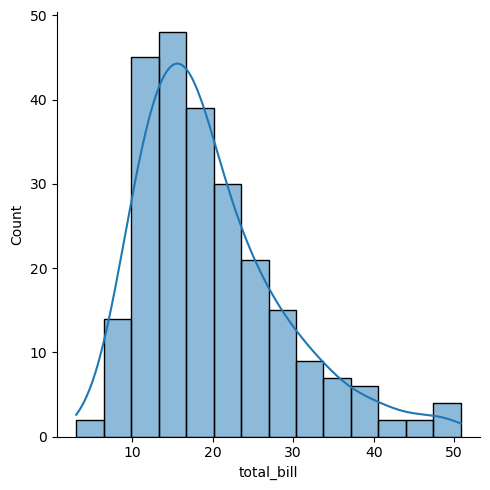

In [56]:
sns.displot(data=tips, x="total_bill", kde=True)

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

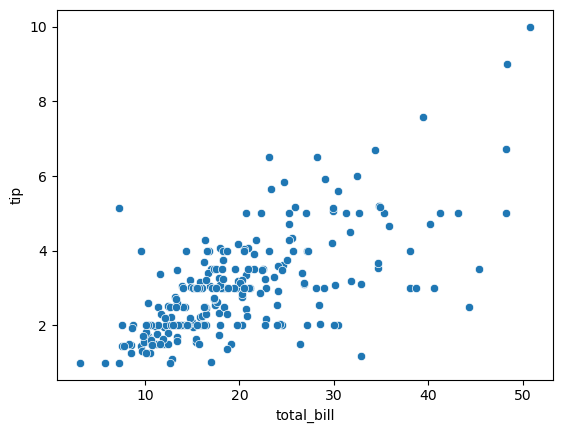

In [10]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

### Постройте pairplot

/Users/kamil/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


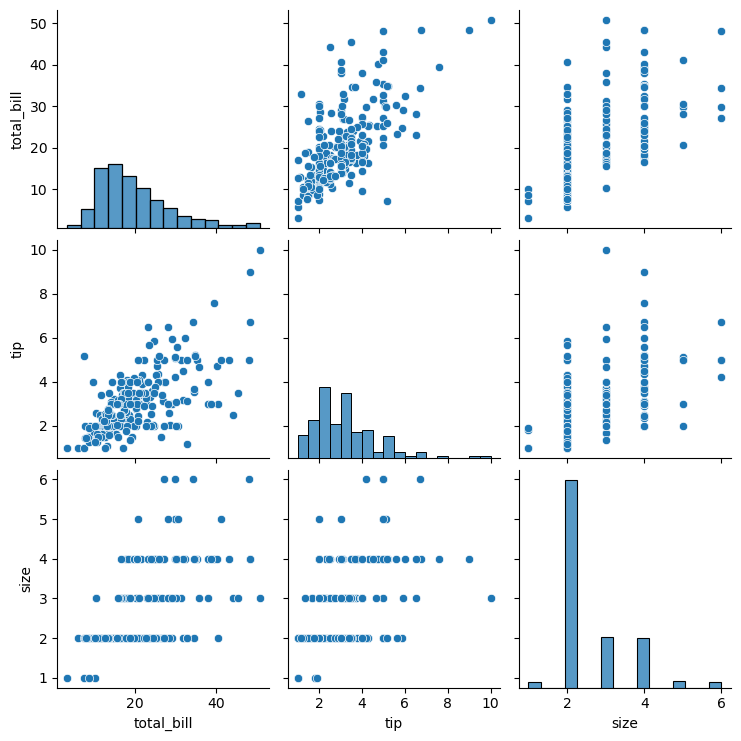

In [11]:
sns.pairplot(tips)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

Text(0, 0.5, 'bill')

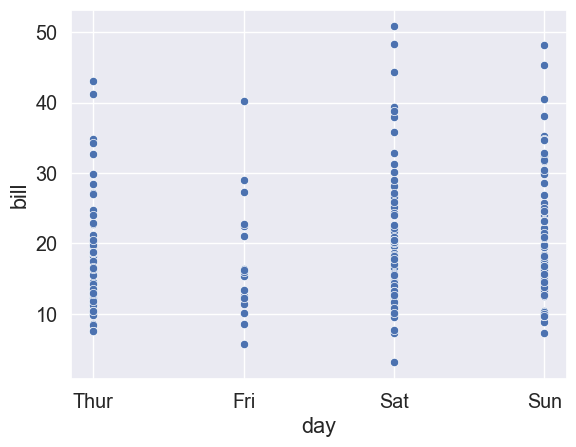

In [18]:
sns.scatterplot(
    x='day', 
    y='total_bill', 
    data=tips)
plt.xlabel(
    'day')
plt.ylabel(
    'bill')

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

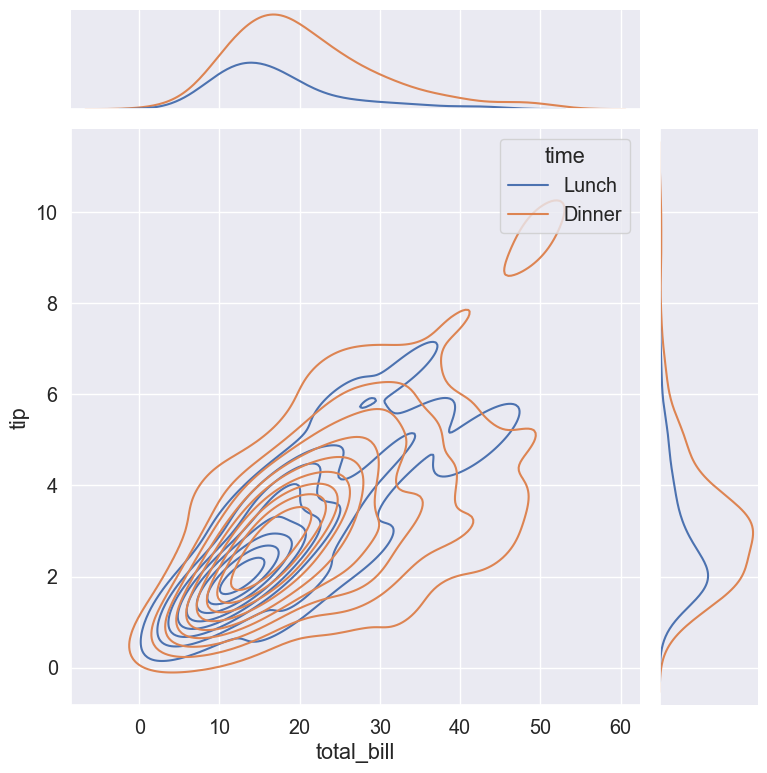

In [17]:
sns.jointplot(data = tips, 
              x = 'total_bill',
              y = 'tip', 
              hue = 'time',
              kind = 'kde', 
              height = 8);

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

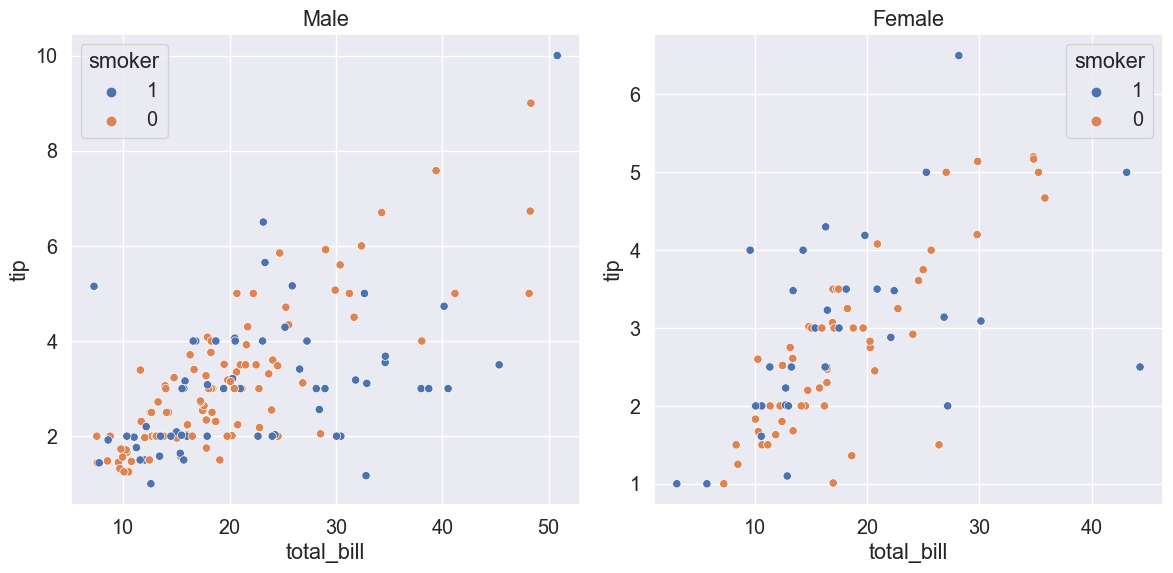

In [28]:
male_tips = tips[tips['sex'] == 'Male']
female_tips = tips[tips['sex'] == 'Female']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=male_tips, x='total_bill', y='tip', hue='smoker')
plt.title('Male')

plt.subplot(1, 2, 2)
sns.scatterplot(data=female_tips, x='total_bill', y='tip', hue='smoker')
plt.title('Female')

plt.tight_layout()
plt.show()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [29]:
# по выходным посещают чаще и оставлют чек больше, чем по будням.
# чаевые пропорциональны сумме чека
# в обед тратят больше денег на еду, чем на ланч
# курящие мужчины дают меньше чаевых, чем их некурящие коллеги 